In [1]:
# Import the dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_df = pd.read_csv("/Users/vishal/Desktop/UNC bootcamp/UNC-VIRT-DATA-PT-03-2023-U-LOLC/Project4-Group3/diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Explore the data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Check the mix of target variables
diabetes_df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [5]:
# Change gender column values to 0, 1, 2
diabetes_df["gender"].replace({"Female": 0, "Male": 1, "Other": 2}, inplace = True)

In [6]:
# Change Smoking histoy columns to -1, 0, 1, 2, 3, 4
#diabetes_df["smoking_history"].replace({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4}, inplace = True)

In [7]:
diabetes_df.drop(columns='smoking_history', axis=1, inplace=True)
diabetes_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


In [8]:
#check for null values in dataset
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Determine the number of unique values in each column
diabetes_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [10]:
# Look at gender for binning
gender_counts = diabetes_df["gender"].value_counts()
gender_counts

0    58552
1    41430
2       18
Name: gender, dtype: int64

In [11]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
# Separate the data into labels and features
X = diabetes_df.drop(columns = "diabetes")

# Separate the y variable, the labels
y = diabetes_df["diabetes"]

# Separate the X variable, the features
X.shape

(100000, 7)

In [13]:
# Review the y variable
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [14]:
# Review the X variable DataFrame
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


In [15]:
# Check the balance of our target values
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [16]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [17]:
X_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
62184,1,15.0,0,0,24.42,5.0,145
2225,1,13.0,0,0,27.32,6.1,100
86999,0,31.0,0,0,27.32,4.5,90
26926,1,15.0,0,0,17.74,4.8,85
27285,0,41.0,0,0,24.36,6.0,80
...,...,...,...,...,...,...,...
51964,1,71.0,0,0,27.32,4.0,145
89598,0,24.0,0,0,30.45,3.5,200
95710,1,55.0,0,1,37.51,5.8,85
50896,1,14.0,0,0,26.85,6.5,158


In [18]:
# Import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression Model
# Assign a random_state parameter of 1 to the model
classifiermodel = LogisticRegression(random_state = 1)

# Fit the model using training data
classifiermodel.fit(X_train, y_train)

/Users/vishal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [19]:
# Make the prediction using the training and testing data
y_pred = classifiermodel.predict(X_test)

print(f"Training Data Score: {classifiermodel.score(X_train, y_train)}")
print(f"Testing Data Score: {classifiermodel.score(X_test, y_test)}")

Training Data Score: 0.95908
Testing Data Score: 0.95924


In [20]:
# Review the results side by side
results = pd.DataFrame({"prediction": y_pred, "Actual": y_test}).reset_index(drop = True)
results.head(100)

,prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [21]:
# print the balanced accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, y_pred)}")

balanced_accuracy_score: 0.8024956605593057


In [22]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred)

array([[22677,   198],
       [  821,  1304]])

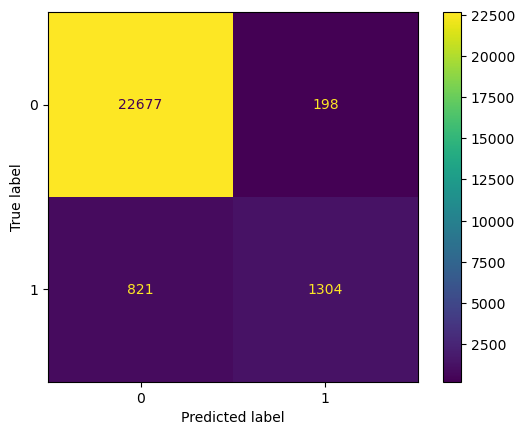

In [23]:
# View confusionmatrix display
# follow documentation to generate ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = confusion_matrix(y_test, y_pred, labels = classifiermodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifiermodel.classes_)

disp.plot()

plt.show()

In [24]:
#print the classification report for the model
target_names = ["Doesn't have Diabetes", "Has Diabetes"]
print(classification_report(y_test, y_pred, target_names = target_names))

                       precision    recall  f1-score   support

Doesn't have Diabetes       0.97      0.99      0.98     22875
         Has Diabetes       0.87      0.61      0.72      2125

             accuracy                           0.96     25000
            macro avg       0.92      0.80      0.85     25000
         weighted avg       0.96      0.96      0.96     25000



In [25]:
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the Random oversampler model
# Assign a random_state parameter of 1 to the model
random_oversampler_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resample, y_resample = random_oversampler_model.fit_resample(X_train, y_train)


In [26]:
# Count the distinct values of the resampled labels data
y_resample.value_counts()

0    68625
1    68625
Name: diabetes, dtype: int64

In [27]:
# Instantiate the LogisticRegression model
# Assign a random_state parameter of 1 to the model

Resampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
Resampled_model.fit(X_resample, y_resample)

# Make a prediction using the testing data
Predictions = Resampled_model.predict(X_test)

/Users/vishal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
Final_results = pd.DataFrame({"prediction": Predictions, "Actual": y_test}).reset_index(drop = True)
Final_results.head(100)

,prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [29]:
# Print the balanced accuracy score of the model
balanced_accuracy_score(y_test, Predictions)

0.8813551912568306

In [30]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, Predictions)

array([[20375,  2500],
       [  272,  1853]])

In [31]:
# Print the classification report for the model
print(classification_report(y_test, Predictions, target_names = ["Has Diabetes", "Doen't have Diabetes"]))

                      precision    recall  f1-score   support

        Has Diabetes       0.99      0.89      0.94     22875
Doen't have Diabetes       0.43      0.87      0.57      2125

            accuracy                           0.89     25000
           macro avg       0.71      0.88      0.75     25000
        weighted avg       0.94      0.89      0.91     25000



In [32]:
import pandas as pd 
import os
from sklearn.svm import SVC

In [33]:
target = diabetes_df ["diabetes"]
target_diabetes = ["Doesn't have Diabetes", "Has Diabetes"]

In [34]:
diabetes_data = diabetes_df.drop ("diabetes", axis=1)
feature_name = diabetes_data.columns
diabetes_data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


In [35]:
#Split data into training and testing
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(diabetes_data, target, random_state=42)


In [36]:
# Support vector machine linear classifier
from sklearn.svm import SVC
diabetes_model = SVC(kernel= 'linear')
diabetes_model.fit(X_train1, y_train1)

SVC(kernel='linear')

In [37]:
#Model Accuracy
print('Test Acc: %.3f' % diabetes_model.score(X_test1, y_test1))

Test Acc: 0.958


In [38]:
# Calculate the classification report
from sklearn.metrics import classification_report
diabetes_predictions = diabetes_model.predict(X_test1)
print(classification_report(y_test1, diabetes_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22850
           1       0.90      0.58      0.70      2150

    accuracy                           0.96     25000
   macro avg       0.93      0.79      0.84     25000
weighted avg       0.96      0.96      0.95     25000

